## Apresentação
O projeto vem com o intuito de gerar um entedimento de quais possiveis fatores podem influenciar na vitória de um time em um campeonato de Dota 2.

## Objetivos
   - Quais fatores mais contribuem para o sucesso de uma equipe em torneios de Dota 2?
   - Como as estatísticas individuais dos jogadores influenciam os resultados das partidas?
   - Existem padrões ou tendências que podem prever o desempenho futuro de uma equipe?

## Equipe
[Rafael P de Carvalho](https://github.com/Skimifil)

## Fonte e critérios
- Fonte: OpenDota API. 
- Critérios: Partidas de torneios, dados de jogadores profissionais e equipes, filtrados por torneios principais.

In [2]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
def connect_api(url):
    """
    Connects to API and returns de data from endpoint.

    :param url: (str) url to connect.
    :return: Data from API.

    Exemple: data = connect_api('https://api.opendota.com/api/proPlayers')

    """
    return requests.get(f'{url}').json()

In [4]:
# Info of teams
req_teams = connect_api(f'https://api.opendota.com/api/teams')
df_teams = pd.DataFrame(req_teams)

# Info of pro matches
req_pro_matches = connect_api(f'https://api.opendota.com/api/proMatches')
df_pro_matches = pd.DataFrame(req_pro_matches)

# Info of pro players
req_pro_players = connect_api(f'https://api.opendota.com/api/proPlayers')
df_pro_players = pd.DataFrame(req_pro_players)


In [5]:
# Info of teams matches
id_of_teams = 36
req_teams_matches = connect_api(f'https://api.opendota.com/api/teams/{id_of_teams}/matches')
df_teams_matches = pd.DataFrame(req_teams_matches)

# Info of teams heroes
req_teams_heroes = connect_api(f'https://api.opendota.com/api/teams/{id_of_teams}/heroes')
df_teams_heroes = pd.DataFrame(req_teams_heroes)

# Info of team players
req_team_players = connect_api(f'https://api.opendota.com/api/teams/{id_of_teams}/players')
df_team_players = pd.DataFrame(req_team_players)

In [10]:
df_teams.head()

,team_id,rating,wins,losses,last_match_time,name,tag,logo_url
0,9247354,1674.51,188,60,1716740280,Team Falcons,FLCN,https://steamusercontent-a.akamaihd.net/ugc/23...
1,7119388,1638.60,545,382,1719767805,Team Spirit,TSpirit,https://steamusercontent-a.akamaihd.net/ugc/18...
2,8599101,1570.14,383,246,1719767805,Gaimin Gladiators,GG,https://steamusercontent-a.akamaihd.net/ugc/18...
3,8605863,1540.17,296,226,1720093082,Entity,Entity,https://steamusercontent-a.akamaihd.net/ugc/25...
4,8261500,1536.74,293,264,1716661500,Xtreme Gaming,XG,https://steamusercontent-a.akamaihd.net/ugc/25...


In [11]:
df_pro_matches.head()

,match_id,duration,start_time,radiant_team_id,radiant_name,dire_team_id,dire_name,leagueid,league_name,series_id,series_type,radiant_score,dire_score,radiant_win,version
0,7828626120,1495,1720100433,9466943,Team Tea,9449532,Kalmychata,15898,European Pro League 2023-2024 Season,888566,1,34,14,True,21
1,7828622285,1559,1720100285,8629324,Swift Knights,8629317,Bright Crusaders,16059,Destiny League,888571,1,33,20,True,21
2,7828600755,2057,1720099451,9360721,KIBA ARMS,9381131,Uzumaki,15901,Ultras Dota Pro League 2023-24,888567,1,48,19,True,21
3,7828569841,2077,1720098540,8894818,PSG.Quest,9303484,Heroic,16881,Riyadh Masters 2024 at Esports World Cup,888572,3,9,31,False,21
4,7828558285,1588,1720097762,8629317,Bright Crusaders,8629324,Swift Knights,16059,Destiny League,888571,1,22,26,False,21


In [12]:
df_pro_players.head()

,account_id,steamid,avatar,avatarmedium,avatarfull,profileurl,personaname,last_login,full_history_time,cheese,...,plus,name,country_code,fantasy_role,team_id,team_name,team_tag,is_locked,is_pro,locked_until
0,1296625,76561197961562353,https://avatars.steamstatic.com/62cef329fd2e6c...,https://avatars.steamstatic.com/62cef329fd2e6c...,https://avatars.steamstatic.com/62cef329fd2e6c...,https://steamcommunity.com/id/Newsham/,it's time,2023-10-21T21:51:11.911Z,2024-05-03T12:36:49.316Z,0.0,...,True,Newsham,,2,8944221,Fart Studios,FRT,True,True,None
1,16497807,76561197976763535,https://avatars.steamstatic.com/a0aca11d96d24e...,https://avatars.steamstatic.com/a0aca11d96d24e...,https://avatars.steamstatic.com/a0aca11d96d24e...,https://steamcommunity.com/id/to_Ofu/,tOfu,2020-12-05T02:26:53.827Z,2024-05-17T14:18:27.162Z,0.0,...,True,tOfu,de,2,8599101,Gaimin Gladiators,GG,True,True,None
2,18180970,76561197978446698,https://avatars.steamstatic.com/1e27bcd82490cb...,https://avatars.steamstatic.com/1e27bcd82490cb...,https://avatars.steamstatic.com/1e27bcd82490cb...,https://steamcommunity.com/profiles/7656119797...,skruva den som pabbe,2018-12-09T23:16:04.851Z,2024-07-02T11:44:24.503Z,0.0,...,False,Handsken,se,2,9368468,Rest Farmers,zzz,True,True,None
3,27178898,76561197987444626,https://avatars.steamstatic.com/5dea3793a2a5d2...,https://avatars.steamstatic.com/5dea3793a2a5d2...,https://avatars.steamstatic.com/5dea3793a2a5d2...,https://steamcommunity.com/profiles/7656119798...,ГНЕВ,2023-02-14T18:09:36.116Z,2024-06-30T08:40:17.441Z,0.0,...,False,Skylark,,1,9280056,JustBetter,JB,True,True,None
4,34505203,76561197994770931,https://avatars.steamstatic.com/2470959bad8623...,https://avatars.steamstatic.com/2470959bad8623...,https://avatars.steamstatic.com/2470959bad8623...,https://steamcommunity.com/id/MinD_ContRoL/,nice,None,2024-06-29T10:05:39.030Z,0.0,...,True,mc,bg,1,39,Shopify Rebellion,SR,True,True,None


In [13]:
df_teams_matches.head()

,match_id,radiant_win,radiant_score,dire_score,radiant,duration,start_time,leagueid,league_name,cluster,opposing_team_id,opposing_team_name,opposing_team_logo
0,7819328003,True,32,10,False,1590,1719589230,16776,Elite League Season 2 EEU Closed Qualifiers – ...,274,9255039,1win,https://steamusercontent-a.akamaihd.net/ugc/25...
1,7819229747,False,6,31,True,1408,1719585980,16776,Elite League Season 2 EEU Closed Qualifiers – ...,274,9255039,1win,https://steamusercontent-a.akamaihd.net/ugc/25...
2,7819114906,True,48,27,True,2203,1719581981,16776,Elite League Season 2 EEU Closed Qualifiers – ...,271,9449532,Kalmychata,https://steamusercontent-a.akamaihd.net/ugc/24...
3,7818972507,False,8,23,False,1736,1719576613,16776,Elite League Season 2 EEU Closed Qualifiers – ...,273,9449532,Kalmychata,https://steamusercontent-a.akamaihd.net/ugc/24...
4,7818890557,False,7,24,True,1773,1719572732,16776,Elite League Season 2 EEU Closed Qualifiers – ...,274,9303383,L1GA TEAM,https://steamusercontent-a.akamaihd.net/ugc/23...


In [14]:
df_teams_heroes.head()

,hero_id,localized_name,games_played,wins
0,86,Rubick,326,181
1,65,Batrider,235,132
2,13,Puck,228,128
3,66,Chen,228,149
4,54,Lifestealer,223,143


In [15]:
df_team_players.head()

,account_id,name,games_played,wins,is_current_team_member
0,70388657,Dendi,1467,831,False
1,89625472,None,913,545,None
2,86723143,None,734,437,None
3,117421467,SoNNeikO,723,376,False
4,87278757,Puppey,640,408,False


## Geração do primeiro Data Wrangling e EDA, apontado seus dados (insights) univariados, bivariados e multivariados:**


- Exemplo de insights univariados: Distribuição de durações de partidas.


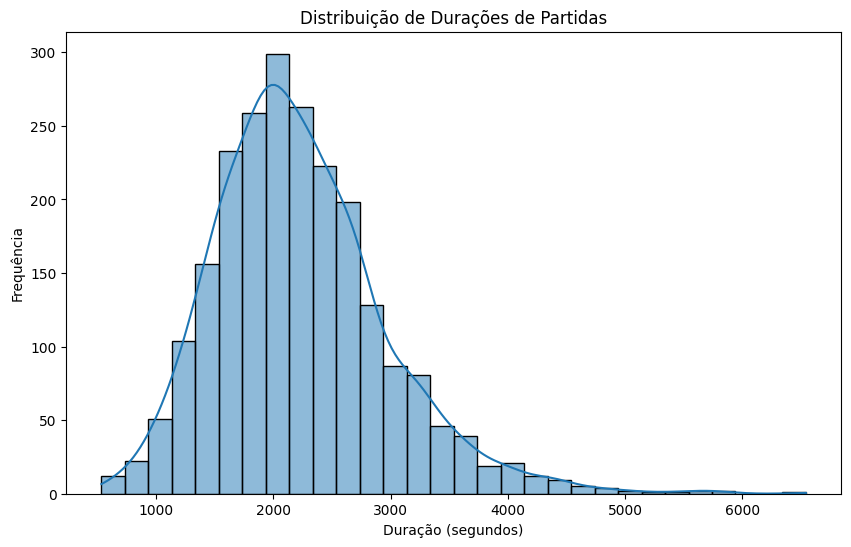

In [8]:

# Criar um histograma para visualizar a distribuição das durações em minutos
plt.figure(figsize=(10, 6))
sns.histplot(df_teams_matches['duration'], bins=30, kde=True)
plt.title('Distribuição de Durações de Partidas')
plt.xlabel('Duração (segundos)')
plt.ylabel('Frequência')
plt.show()

- Insights bivariados: Correlação entre a quantidade de vitórias e o 'rating' da equipe.


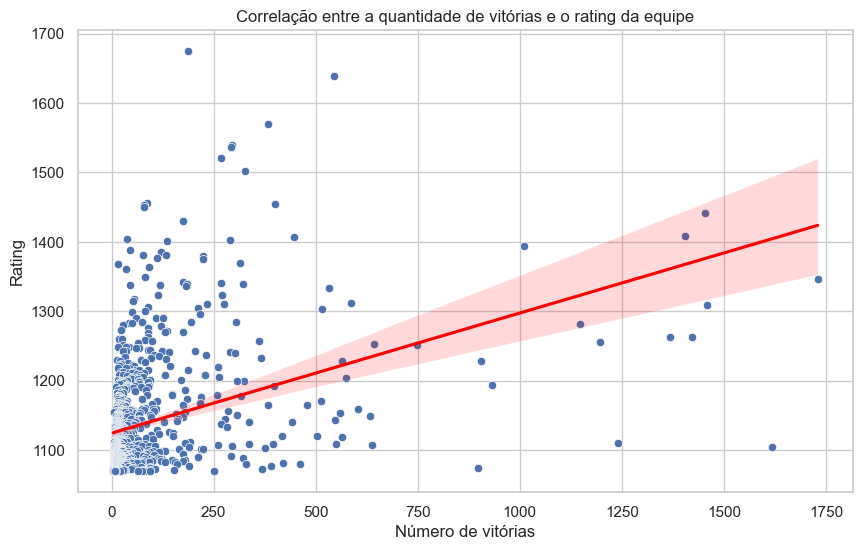

In [12]:
# Configurar o estilo do Seaborn
sns.set(style="whitegrid")

# Criar o gráfico de dispersão com a linha de tendência
plt.figure(figsize=(10, 6))
sns.scatterplot(x='wins', y='rating', data=df_teams)
sns.regplot(x='wins', y='rating', data=df_teams, scatter=False, color='red')

# Adicionar título e rótulos
plt.title('Correlação entre a quantidade de vitórias e o rating da equipe')
plt.xlabel('Número de vitórias')
plt.ylabel('Rating')

# Mostrar o gráfico
plt.show()

   - Insights multivariados: 

## Análise de Componentes Principais

Variância explicada pelos componentes principais: [0.69209717 0.30790283]
Cargas dos componentes principais:
              PC1       PC2
rating  0.707107  0.707107
wins    0.707107 -0.707107


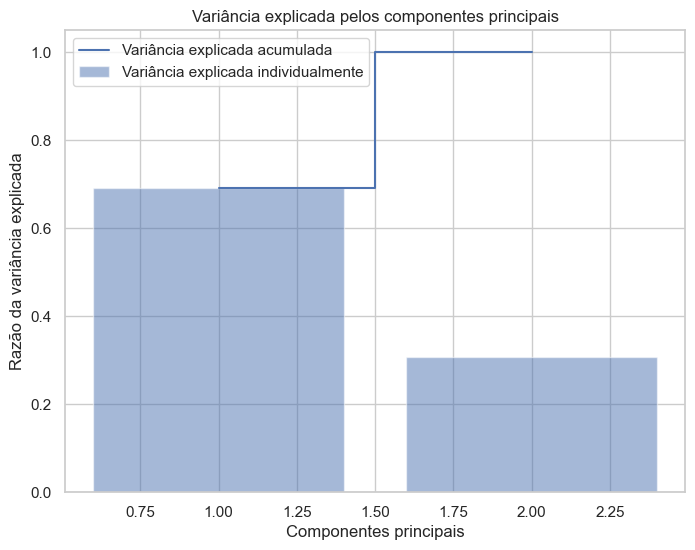

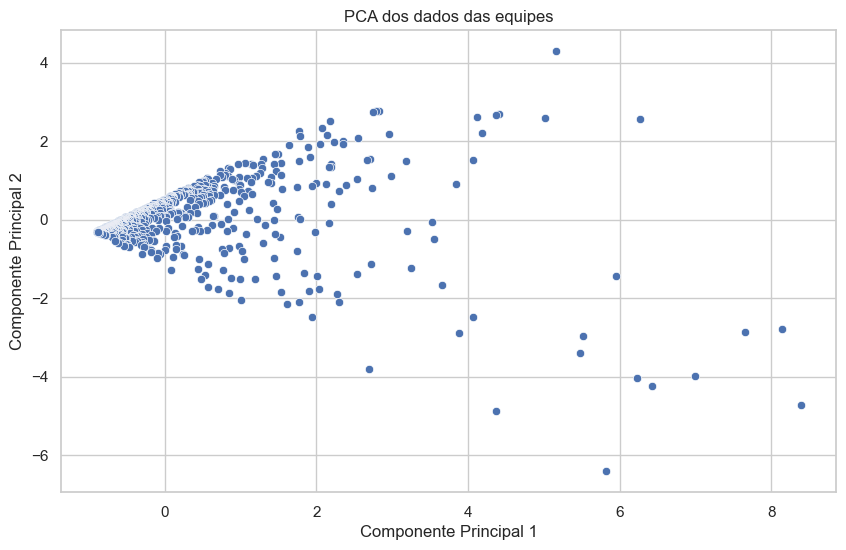

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Selecionar as colunas relevantes para a análise
features = ['rating', 'wins']  # Adicione mais colunas se necessário
x = df_teams[features]

# Normalizar os dados
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Aplicar o PCA
pca = PCA(n_components=2)  # Reduzindo para 2 componentes principais
principalComponents = pca.fit_transform(x_scaled)

# Criar um DataFrame com os componentes principais
pca_df = pd.DataFrame(data=principalComponents, columns=['PC1', 'PC2'])

# Adicionar o PCA ao DataFrame original
df_pca = pd.concat([df_teams.reset_index(drop=True), pca_df], axis=1)

# Visualizar a variabilidade explicada pelos componentes principais
explained_variance = pca.explained_variance_ratio_
print(f"Variância explicada pelos componentes principais: {explained_variance}")

# Visualizar as componentes principais e suas cargas
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=features)
print("Cargas dos componentes principais:\n", loadings)

# Plotar a variabilidade explicada
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5, align='center', label='Variância explicada individualmente')
plt.step(range(1, len(explained_variance) + 1), explained_variance.cumsum(), where='mid', label='Variância explicada acumulada')
plt.ylabel('Razão da variância explicada')
plt.xlabel('Componentes principais')
plt.legend(loc='best')
plt.title('Variância explicada pelos componentes principais')
plt.show()

# Visualizar os componentes principais em um gráfico de dispersão
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', data=df_pca)
plt.title('PCA dos dados das equipes')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()
